Iteration 1, loss = 0.28629151
Iteration 2, loss = 0.15209803
Iteration 3, loss = 0.13553080
Iteration 4, loss = 0.12594909
Iteration 5, loss = 0.13133540
Iteration 6, loss = 0.12677642
Iteration 7, loss = 0.12633098
Iteration 8, loss = 0.13991378
Iteration 9, loss = 0.10940452
Iteration 10, loss = 0.13768005
Iteration 11, loss = 0.19583202
Iteration 12, loss = 0.15736557
Iteration 13, loss = 2.32111894
Iteration 14, loss = 2.34304156
Iteration 15, loss = 2.34687338
Iteration 16, loss = 2.34520223
Iteration 17, loss = 2.33587975
Iteration 18, loss = 2.33652211
Iteration 19, loss = 2.34620287
Iteration 20, loss = 2.34785878
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.11478571428571428
Confusion Matrix:
[[   0 1343    0    0    0    0    0    0    0    0]
 [   0 1600    0    0    0    0    0    0    0    0]
 [   0 1376    4    0    0    0    0    0    0    0]
 [   0 1432    0    1    0    0    0    0    0    0]
 [   0 1295    0   

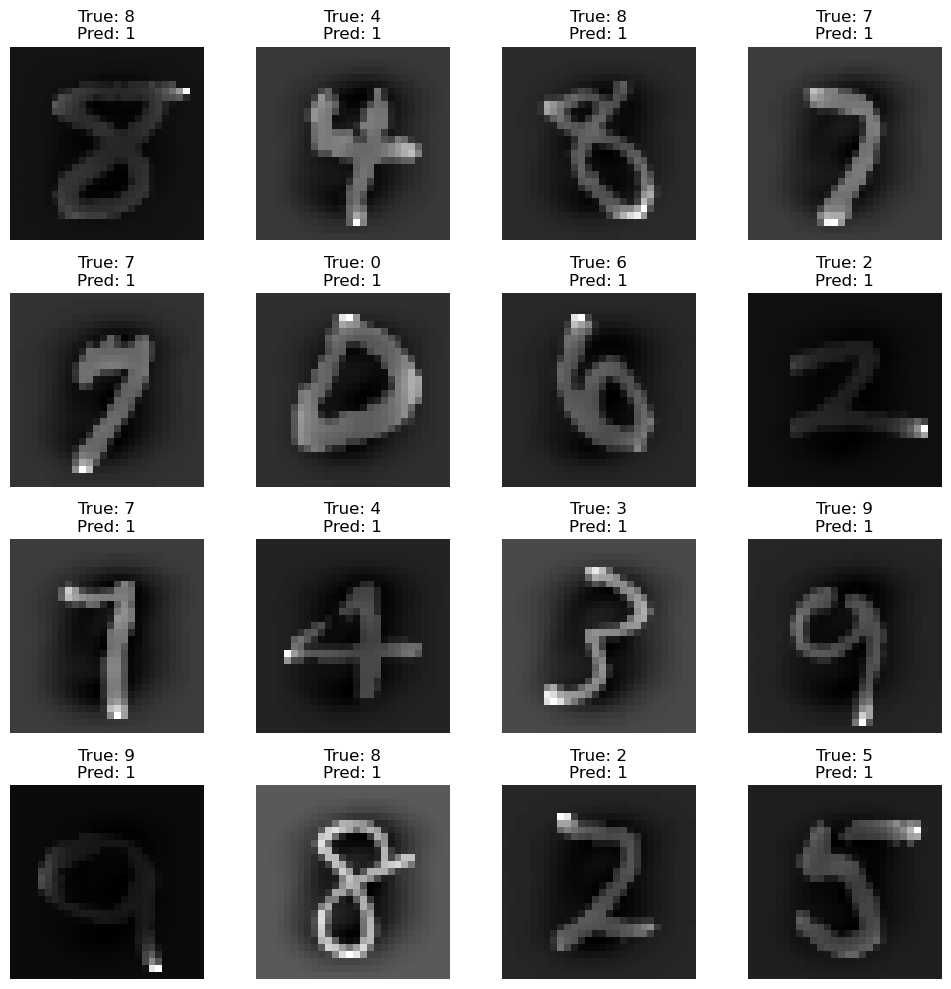

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)  # Convert labels to integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data to have mean 0 and variance 1 (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the neural network
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=42,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = mlp.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plot some sample images with their predictions
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
